**IT'S MY FIRST STEP IN MACHINE LEARNING, AND HOPEFULLY, I WILL MASTER IT SOON!**


# **__"Movie Budget vs. Gross Revenue: A Linear Regression Analysis"__**

### **Summary:**  
Apply linear regression to predict the gross income of a movie based on its budget.


In [190]:
import pandas as pd

In [191]:
from pandas import DataFrame

In [192]:
movies = pd.read_csv("app.csv")

In [193]:
movies.head(2)
movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Column 1           1000 non-null   object 
 1   Release
Date       1000 non-null   object 
 2   Movie              1000 non-null   object 
 3   Production
Budget  1000 non-null   object 
 4   Domestic
Gross     1000 non-null   object 
 5   Worldwide
Gross    1000 non-null   object 
 6   Column 2           0 non-null      float64
 7   Column 3           0 non-null      float64
 8   Column 4           0 non-null      float64
 9   Column 5           0 non-null      float64
 10  Column 6           0 non-null      float64
dtypes: float64(5), object(6)
memory usage: 86.1+ KB


In [194]:
movies.drop(["Release\nDate","Movie","Column 2","Column 3","Column 4","Column 5","Column 6"],axis = 1, inplace = True)

In [195]:
movies.describe()

,Column 1,Production\nBudget,Domestic\nGross,Worldwide\nGross
count,1000,1000,1000,1000
unique,999,141,972,985
top,901,"$80,000,000",$0,$0
freq,2,79,29,16


In [196]:
movies.rename(columns={'Production\nBudget': 'budget'}, inplace=True)

In [197]:
movies.head(2)

,Column 1,budget,Domestic\nGross,Worldwide\nGross
0,2,"$460,000,000","$684,075,767","$2,315,589,775"
1,3,"$402,300,000","$174,480,468","$383,963,057"


In [198]:
movies.rename(columns={'Worldwide\nGross': 'gross'}, inplace=True)

In [199]:
movies.head(2)

,Column 1,budget,Domestic\nGross,gross
0,2,"$460,000,000","$684,075,767","$2,315,589,775"
1,3,"$402,300,000","$174,480,468","$383,963,057"


In [200]:
del movies["Domestic\nGross"]

In [201]:
movies.head(2)

,Column 1,budget,gross
0,2,"$460,000,000","$2,315,589,775"
1,3,"$402,300,000","$383,963,057"


In [202]:
movies.head(2)

,Column 1,budget,gross
0,2,"$460,000,000","$2,315,589,775"
1,3,"$402,300,000","$383,963,057"


In [203]:
movies["budget"]= movies["budget"].str.replace("$","",regex = False)
movies["gross"]= movies["gross"].str.replace("$","",regex = False)



In [204]:
movies

,Column 1,budget,gross
0,2,"460,000,000","2,315,589,775"
1,3,"402,300,000","383,963,057"
2,4,"400,000,000","2,748,242,781"
3,5,"379,000,000","1,045,713,802"
4,6,"365,000,000","1,395,316,979"
...,...,...,...
995,996,"65,000,000","516,279"
996,997,"65,000,000",0
997,998,"65,000,000",0
998,999,"64,000,000","101,636,047"


In [205]:
movies = movies.dropna()

In [206]:
x =movies["budget"]
y = movies["gross"]


In [207]:
movies.isnull().sum()

Column 1    0
budget      0
gross       0
dtype: int64

In [208]:
import matplotlib.pyplot as plt
import seaborn as sns

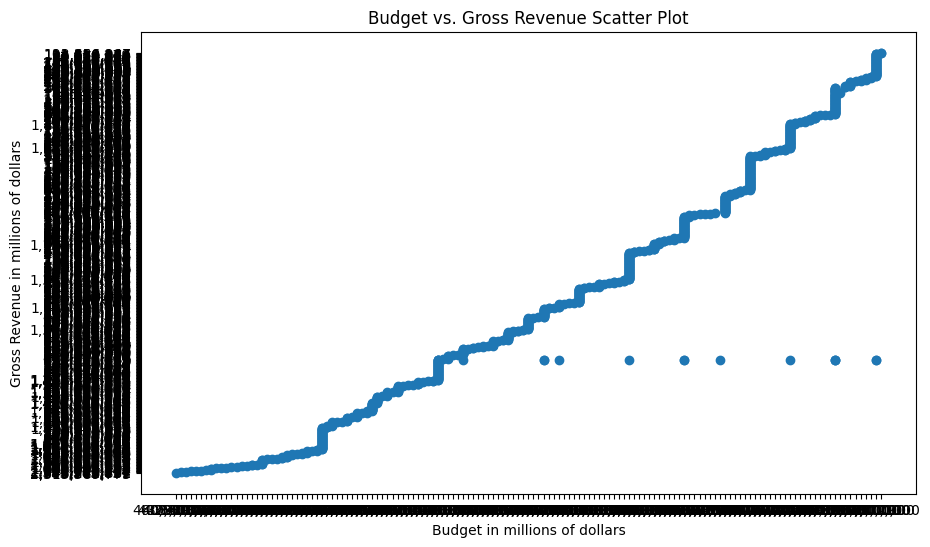

In [209]:
plt.figure(figsize = (10,6))
plt.scatter(x,y)#,#alpha = 0.3)
plt.xlabel("Budget in millions of dollars")
plt.ylabel("Gross Revenue in millions of dollars")
plt.title("Budget vs. Gross Revenue Scatter Plot")
plt.show()

In [210]:
import sklearn
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [211]:
x = x.replace(',', '', regex=True).astype(float)  # Remove commas and convert to float
y = y.replace(',', '', regex=True).astype(float)

In [212]:
from sklearn.linear_model import LinearRegression

In [213]:
import numpy as np

# Reshape x to 2D
x = np.array(x).reshape(-1, 1)
y=np.array(y).reshape(-1,1)


In [214]:
regression = LinearRegression()

In [215]:
regression.fit(x,y)

LinearRegression()

slope

In [216]:
regression.coef_

array([[3.66551729]])

In [217]:
x.shape

(1000, 1)

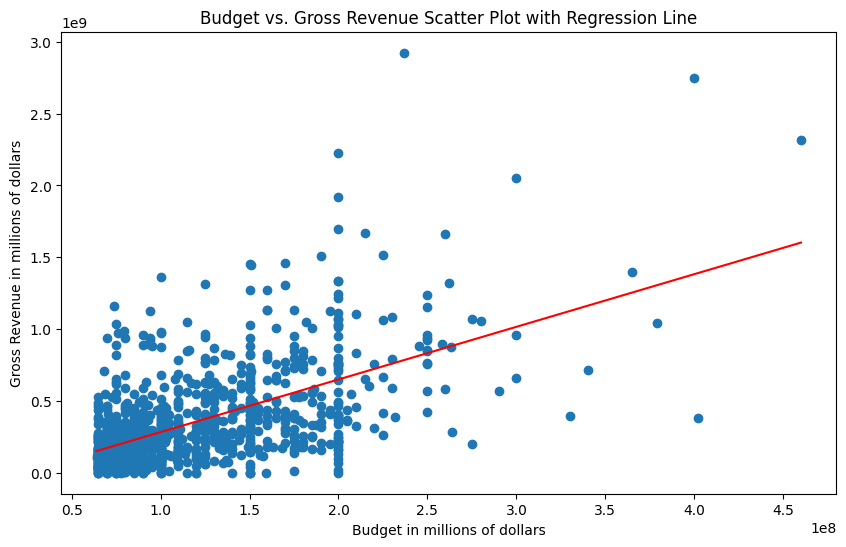

In [218]:
plt.figure(figsize = (10,6))
plt.scatter(x,y)#,#alpha = 0.3)
#plt.plot(x,regression.predict(x),color = "red")
plt.plot(x,regression.predict(x),color = "red")
plt.xlabel("Budget in millions of dollars")
plt.ylabel("Gross Revenue in millions of dollars")
plt.title("Budget vs. Gross Revenue Scatter Plot with Regression Line")
plt.show()

**CALCULATE RESIDUAL**

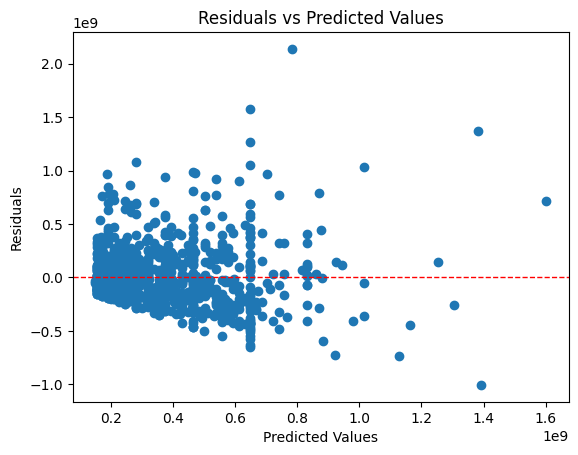

In [219]:
y_predicts = regression.predict(x)
residual = y-y_predicts
plt.scatter(y_predicts,residual)
#plt.scatter(x,y)
plt.axhline(y=0, color="red", linestyle="--", linewidth=1)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")

plt.show()

In [220]:
regression.score(x,y)

0.3371230531722369

In [221]:
# which means model is 33% correct

In [222]:
# now a random value 

In [223]:
random = np.array([[400000]])

In [224]:
predicted_value = regression.predict(random)
predicted_value

array([[-82545966.25739957]])

In [225]:
r2 = r2_score(y, regression.predict(x))
mse = mean_squared_error(y,regression.predict(x) )
mae = mean_absolute_error(y, regression.predict(x))

**EVALUATION**

In [226]:
r2

0.3371230531722369

In [227]:
mse

7.593767622112696e+16

In [228]:
mae

190331161.32740864